# Biodiversity in National Parks

## Introduction

This project will analyze data from the National Parks Service about endangered species in different parks. This includes  analyzing the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.

Here are a few questions that this project will seek to answer:

+ What is the distribution of conservation_status for animals?
+ Are certain types of species more likely to be endangered?
+ Are the differences between species and their conservation status significant?
+ Which categories were spotted the most at each park?

##  Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_theme(style='whitegrid') # set theme to be whitegrid

from scipy.stats import chi2_contingency

## Load the Data

observations.csv file contains the observations of different species at different national parks.

In [2]:
# Load observations csv file
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


species_info.csv contains data about different species and their conservation status

In [3]:
# Load species csv file
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Preliminary Data Finding

### 1. Explore the Observations data

In [4]:
# Check the shape of observations.
print('Observations Shape:',observations.shape)

Observations Shape: (23296, 3)


In [5]:
# Check observations information.
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


There are 23,296 rows and 3 columns.
No missing data for this dataset.

In [6]:
# Check for duplicate in observations dataset
observations.duplicated().sum()

15

In [7]:
# Check the unique number for each column.
print('No. of scientific name:',observations.scientific_name.nunique())
print('No. of parks:',observations.park_name.nunique())

No. of scientific name: 5541
No. of parks: 4


In [8]:
# Check the unique park names.
print('Park name:',observations.park_name.unique())

Park name: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


+ There are 4 parks namely, Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park and Yellowstone National Park.
+ There is a total of 5,541 unique species recorded.

In [9]:
# Check total number of observations.
print('Total no. of observations:', observations.observations.sum())

Total no. of observations: 3314739


A total of 3,314,739 observations collected over the 7 days.

### 2. Explore the Species data

In [10]:
# Check the shape of species.
print('Species Shape:',species.shape)

Species Shape: (5824, 4)


In [11]:
# Check species information.
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [12]:
# Check the unique number for each column.
print('Category:',species.category.nunique())
print('Scientific name:',species.scientific_name.nunique())
print('Common name:',species.common_names.nunique())
print('Conservation status:',species.conservation_status.nunique())

Category: 7
Scientific name: 5541
Common name: 5504
Conservation status: 4


In [13]:
# Check for duplicate in species dataset
species.duplicated(subset='scientific_name').sum()

283

+ There are 5,824 rows and 4 columns. 
+ Missing data observed for the conservation_status. 
+ We note there are 5,541 unique scientific names but 5,824 rows. Hence, scientific name is checked whether there are duplicates and we confirmed there are 283 duplicate scientific names.

In [14]:
# Check the unique values for category and conservation status.
print('Category:',species.category.unique())
print('Conservation status:',species.conservation_status.unique())

Category: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Conservation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


+ There are 7 categories namely, Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, and Nonvascular Plant.
+ There are 4 conservation status namely, Species of Concern, Endangered, Threatened and In Recovery.

Next, we will check out the size for category and conservation status.

In [15]:
# Check the category size.
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

We note the majority is classified as Vascular Plant.

In [16]:
# Check for missing data.
species.isnull().sum(axis=0)

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [17]:
# Check conservation status size.
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

+ We note the majority do not have a conservation status as there are 5,633 nan values. 
+ For those with conservation status, there are 161 Species of Concern, followed by 16 Endangered, 10 Threatened and 4 In Recovery.

## Data Cleaning 

We will tackle the nan values for the conservation_status. As these are species that are not endangered, threatened or of concern, we will replace the nan value with "None".

In [18]:
# Handle the missing data for conservation status.
species.fillna('None', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
None                  5633
Species of Concern     161
Threatened              10
dtype: int64

We will remove the duplicates in the species and observations dataset.

In [19]:
# Remove the duplicate scientific name in species dataset.
species = species.drop_duplicates(subset='scientific_name')
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In [20]:
# Remove the duplicate values in observation dataset.
observations = observations.drop_duplicates()
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.5+ KB


## Exploratory Data Analysis 

Firstly, we want to know the distribution of the conservation status. We will need to extract the data where the conservation status is not "None".

In [21]:
# Create a dataset that contains only data that has conservation status with concern.
conservationCat = species[species.conservation_status != 'None']
conservationCat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 7 to 5676
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             178 non-null    object
 1   scientific_name      178 non-null    object
 2   common_names         178 non-null    object
 3   conservation_status  178 non-null    object
dtypes: object(4)
memory usage: 7.0+ KB


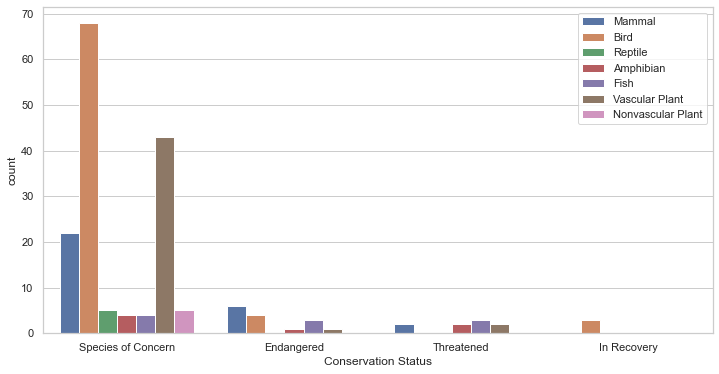

In [22]:
# Check conservation_status distribution.
plt.figure(figsize=(12, 6))
sns.countplot(x='conservation_status', hue='category', data=conservationCat)
plt.xlabel('Conservation Status')
plt.legend(loc='upper right')

In [23]:
# Create a dataframe categorize by conservation status and categories.
cat_count = pd.pivot_table(conservationCat, index='conservation_status', columns='category', values='scientific_name',\
                aggfunc='count', margins=True)
cat_count.fillna(0, inplace=True)
cat_count = cat_count.drop('All', axis=0)
cat_count = cat_count.sort_values(by=['All'], ascending=False)
cat_count 

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant,All
conservation_status,,,,,,,,
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0,151
Endangered,1.0,4.0,3.0,6.0,0.0,0.0,1.0,15
Threatened,2.0,0.0,3.0,2.0,0.0,0.0,2.0,9
In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3


Species of Concern has the highest number. The top three categories with this conservation status are Bird, Vascular Plant and Mammal.

Next, we like to understand if there is any certain types of species more likely to be endangered? To do so, we will need to know if the species are protected. If the conservation status is not "None", it means protected.

In [24]:
# Add 'is_protected' column to the species dataset.
species['is_protected'] = species.conservation_status != 'None'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None,False
1,Mammal,Bos bison,"American Bison, Bison",None,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",None,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",None,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,None,False


In [25]:
# Create a dataframe on the protected vs not protected species.
species_1 = pd.pivot_table(species, index='category', columns='is_protected', values='scientific_name', aggfunc='count',\
                margins=True)
species_1 = species_1.drop('All', axis=1)
species_1 = species_1.drop('All', axis=0)
species_1.columns = ['Not_protected', 'Protected']
species_1['Percent_Protected'] = round((species_1['Protected']/(species_1['Protected']+species_1['Not_protected']))* 100,2)
species_1 = species_1.sort_values(by='Percent_Protected', ascending=False)
species_1

,Not_protected,Protected,Percent_Protected
category,,,
Mammal,146,30,17.05
Bird,413,75,15.37
Amphibian,72,7,8.86
Fish,115,10,8.00
Reptile,73,5,6.41
Nonvascular Plant,328,5,1.50
Vascular Plant,4216,46,1.08


Mammal, Bird and Amphibian are the top 3 protected species.

To see if there is significant differences between species and their conservation status, we will run the chi-squared test since we are dealing with categorical data. As mammal has the highest number of protection, we will check its significant with the other categories.

In [26]:
# Function to run chi-squared test between 2 differents species.
def conv_status_test(category1, category2):
    print(species_1.loc[[category1, category2],['Not_protected','Protected']])
    chi2, pval, dof, exp = chi2_contingency(species_1.loc[[category1, category2],['Not_protected','Protected']])
    print('pval:', round(pval,3))

In [27]:
# Check significant different between mammal and bird.
conv_status_test('Mammal', 'Bird')

          Not_protected  Protected
category                          
Mammal              146         30
Bird                413         75
pval: 0.688


In [28]:
# Check significant different between mammal and bird.
conv_status_test('Mammal', 'Amphibian')

           Not_protected  Protected
category                           
Mammal               146         30
Amphibian             72          7
pval: 0.128


In [29]:
# Check significant different between mammal and bird.
conv_status_test('Mammal', 'Fish')

          Not_protected  Protected
category                          
Mammal              146         30
Fish                115         10
pval: 0.035


In [30]:
# Check significant different between mammal and bird.
conv_status_test('Mammal', 'Reptile')

          Not_protected  Protected
category                          
Mammal              146         30
Reptile              73          5
pval: 0.038


In [31]:
# Check significant different between Nonvascular Plant and Vascular Plant.
conv_status_test('Nonvascular Plant', 'Vascular Plant')

                   Not_protected  Protected
category                                   
Nonvascular Plant            328          5
Vascular Plant              4216         46
pval: 0.662


Based on the above testings, the difference between fish and mammal and between reptile and mammal are statistically significant as the p-value is 0.035 and 0.039 respectively (<0.050). Mammals are shown to have a statistically significant higher rate of protection with reptile or fish.

We will proceed to see the observation dataset to check which categories were spotted the most at each park.

Text(0.5, 0, 'Park Name')

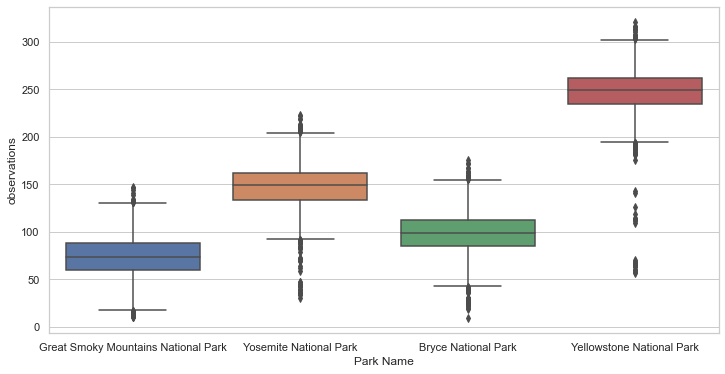

In [32]:
# Check observation distribution.
plt.figure(figsize=(12, 6))
sns.boxplot(x='park_name', y= 'observations', data=observations)
plt.xlabel('Park Name')

Yellowstone National Park has the highest observations.

We will merge the observation dataset with species in order to get the categories.

In [33]:
# Merge the 2 datasets.
obs_species = pd.merge(observations, species[['scientific_name', 'category']], how='left', on='scientific_name' )
obs_species

,scientific_name,park_name,observations,category
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant
...,...,...,...,...
23276,Croton monanthogynus,Yosemite National Park,173,Vascular Plant
23277,Otospermophilus beecheyi,Bryce National Park,130,Mammal
23278,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant
23279,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant


In [34]:
# Create a dataframe categorize by the categories and parks.
obs_by_category = pd.pivot_table(obs_species, index='park_name', columns='category', values='observations', \
                    aggfunc='sum', margins=True)
obs_by_category = obs_by_category.drop('All', axis=0)
obs_by_category = obs_by_category.drop('All', axis=1)
obs_by_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7380,51647,12423,20550,32992,7950,442959
Great Smoky Mountains National Park,5707,37728,9206,15012,24857,5691,333177
Yellowstone National Park,19440,126996,30574,50539,83021,19554,1112190
Yosemite National Park,11444,76207,18615,30339,49783,11483,664965


In [35]:
# Calculate the observation percentage for each category.
obs_by_category_percent = obs_by_category.apply(lambda x: round((x/sum(x)*100),2), axis=1)
obs_by_category_percent

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,1.28,8.97,2.16,3.57,5.73,1.38,76.92
Great Smoky Mountains National Park,1.32,8.75,2.13,3.48,5.76,1.32,77.24
Yellowstone National Park,1.35,8.81,2.12,3.50,5.76,1.36,77.11
Yosemite National Park,1.33,8.83,2.16,3.52,5.77,1.33,77.07


Text(0.5, 0, 'Park Name')

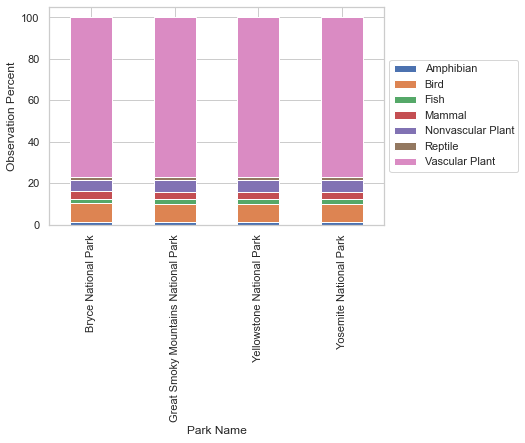

In [36]:
# Plot the visualization.
obs_by_category_percent.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Observation Percent')
plt.xlabel('Park Name')

Vascular Plant is most sighted, followed by Bird and Non Vascular Plant for all the 4 parks.

## Conclusions 

We have analyzed and plotted a few visualizations for this project to answer the below questions posted at the beginning of this project.

+ What is the distribution of conservation_status for animals? 
    + Conservation status, "Species of Concern" has the highest number. The top three categories with this conservation status are Bird, Vascular Plant and Mammal.
+ Are certain types of species more likely to be endangered?
    + Mammal, Bird and Amphibian are the top 3 protected species. 
+ Are the differences between species and their conservation status significant?
    + Mammals are shown to have a statistically significant higher rate of protection with reptile or fish.
+ Which categories were spotted the most at each park?
    + Vascular Plant is most sighted for all the 4 nation parks. Yellowstone National Park has the highest number of observations.

To conclude, the 4 nation parks have similar biodiversity. Majority of the species are not under conservation. As observation was done for only 7 days, we recommend to continue to the observations to see if there any changes to the conservation status and sightings.